<a href="https://colab.research.google.com/github/Vale150299/espd1-test/blob/main/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data organisation and how to download ERA5

The full ERA5 and ERA5T datasets are held in the ECMWF data archive (MARS) and a pertinent sub-set of these data, interpolated to a regular latitude/longitude grid, has been copied to the C3S Climate Data Store (CDS) disks. On the CDS disks, where most single level and pressure level parameters are available, analyses are provided rather than forecasts, unless the parameter is only available from the forecasts.

1. This is formatted as code copy and store your API key in file $HOME/.cdsapirc. You find it at the bottom of your personal profile when you are logged in the CDS.

In [90]:
# Define the content of the .cdsapirc file
cdsapirc_content = """
url: https://cds.climate.copernicus.eu/api/v2
key: 305621:c1c175cb-f45e-4395-8f13-3b3feef879d6
"""

# Write the content to the .cdsapirc file in the home directory
with open('/root/.cdsapirc', 'w') as file:
    file.write(cdsapirc_content)


This Python code will create a file named .cdsapirc in the home directory of the Colab environment (/root/), and it will write your CDS API key information into that file.
After running this code cell in Colab, you should have the .cdsapirc file with your API key stored in the appropriate location.

2. Install modules

In [91]:
!pip install cdsapi
!pip install xarray

3. Retrieve the ERA5 or ERA5T data: Use the retrieve method of the cdsapi.Client object to download the desired dataset. You will need to specify parameters such as the variable, time period, geographical extent, and resolution.

In [92]:
import cdsapi

In [93]:
c = cdsapi.Client()

In [114]:
#!/usr/bin/env python
import cdsapi

c = cdsapi.Client()

c.retrieve("reanalysis-era5-complete", {
    "class": "ea",
    "date": "2023-01-01",
    "expver": "1",
    "levelist": "137",
    "levtype": "ml",
    "grid": "5.625/5.625",
    "param": "130",
    "step": "0",
    "stream": "oper",
    "time": "09:00:00/21:00:00",
    "type": "an",
    "format": "netcdf"
}, "test.nc")

2024-05-02 13:19:55,040 INFO Welcome to the CDS
INFO:cdsapi:Welcome to the CDS
2024-05-02 13:19:55,044 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-complete
INFO:cdsapi:Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-complete
2024-05-02 13:19:55,298 INFO Request is queued
INFO:cdsapi:Request is queued
2024-05-02 13:19:56,522 INFO Request is running
INFO:cdsapi:Request is running
2024-05-02 13:19:58,244 INFO Request is completed
INFO:cdsapi:Request is completed
2024-05-02 13:19:58,248 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data6/adaptor.mars.external-1714655996.8782594-25751-5-aa30600f-372a-47cd-8592-3e9f28a0f00a.nc to test.nc (9.7K)
INFO:cdsapi:Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data6/adaptor.mars.external-1714655996.8782594-25751-5-aa30600f-372a-47cd-8592-3e9f28a0f00a.nc to test.nc (9.7K)
2024-05-02

Result(content_length=9948,content_type=application/x-netcdf,location=https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data6/adaptor.mars.external-1714655996.8782594-25751-5-aa30600f-372a-47cd-8592-3e9f28a0f00a.nc)

In the script, the 'grid' parameter specifies the latitude/longitude grid resolution for the data extraction. Here, it's set to [1.0, 1.0], which means that the data will be provided on a grid where each grid cell represents 1 degree of latitude by 1 degree of longitude.

The default grid resolution for ERA5 data is 5.625 x 5.625 degrees. By setting 'grid': [1.0, 1.0], you are requesting a coarser grid resolution, which might result in faster data retrieval and smaller file sizes compared to using the default grid resolution.

Here's a breakdown of the parameters you're using in your request:

-class: Specifies the type of data, which is "ea" for ERA5 reanalysis data.
-date: Specifies the date for which you want to retrieve data. In this case, it's January 1, 2023.

-expver: Specifies the version of the dataset, which is "1" in this case.

-levelist: Specifies the pressure level(s) for which you want data. Here, it's "1", indicating the first pressure level.

-levtype: Specifies the type of vertical level. "ml" stands for model level.

-param: Specifies the parameter code.Here, "130" represents temperature.

-stream: Specifies the data stream, which is "oper" for operational data.

-time: Specifies the time of day for which you want data. Here, it's 09:00:00.

-type: Specifies the type of data, either analysis ("an") or forecast ("fc").

Finally, the retrieved data will be saved in a file named "test.nc" in NetCDF format.

In [98]:
c.retrieve("reanalysis-era5-complete", {
    "class": "ea",
    "date": "2023-01-01",
    "expver": "1",
    "levelist": "137",
    "levtype": "ml",
    "grid": "5.625/5.625",
    "param": "130",
    "step": "0",
    "stream": "oper",
    "time": "09:00:00/21:00:00",
    "type": "4v",
    "format": "netcdf"
}, "test.nc2")

2024-05-02 12:55:26,677 INFO Welcome to the CDS
INFO:cdsapi:Welcome to the CDS
2024-05-02 12:55:26,682 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-complete
INFO:cdsapi:Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-complete
2024-05-02 12:55:26,991 INFO Request is queued
INFO:cdsapi:Request is queued
2024-05-02 12:55:28,218 INFO Request is running
INFO:cdsapi:Request is running
2024-05-02 12:55:29,943 INFO Request is completed
INFO:cdsapi:Request is completed
2024-05-02 12:55:29,947 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data0/adaptor.mars.external-1714654527.8235564-334-4-50d2f704-3791-49e9-98a4-7f753c9e7c3c.nc to test.nc2 (9.7K)
INFO:cdsapi:Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data0/adaptor.mars.external-1714654527.8235564-334-4-50d2f704-3791-49e9-98a4-7f753c9e7c3c.nc to test.nc2 (9.7K)
2024-05-02 12:55:31,203 

Result(content_length=9944,content_type=application/x-netcdf,location=https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data0/adaptor.mars.external-1714654527.8235564-334-4-50d2f704-3791-49e9-98a4-7f753c9e7c3c.nc)

In the case of your dataset, it contains temperature data for 6 specific time points. These time points are spaced at regular intervals (e.g., every 6 hours)

In [116]:
import subprocess

# Define the command to execute
command = ['ncdump', '-t', '-v', 'latitude,longitude,time', 'test.nc']

# Execute the command and capture the output
output = subprocess.run(command, capture_output=True, text=True)

# Print the output
print(output.stdout)


netcdf test {
dimensions:
	longitude = 64 ;
	latitude = 33 ;
	time = 2 ;
variables:
	float longitude(longitude) ;
		longitude:units = "degrees_east" ;
		longitude:long_name = "longitude" ;
	float latitude(latitude) ;
		latitude:units = "degrees_north" ;
		latitude:long_name = "latitude" ;
	int time(time) ;
		time:units = "hours since 1900-01-01 00:00:00.0" ;
		time:long_name = "time" ;
		time:calendar = "gregorian" ;
	short t(time, latitude, longitude) ;
		t:scale_factor = 0.00117676876535486 ;
		t:add_offset = 273.255927118547 ;
		t:_FillValue = -32767s ;
		t:missing_value = -32767s ;
		t:units = "K" ;
		t:long_name = "Temperature" ;
		t:standard_name = "air_temperature" ;

// global attributes:
		:Conventions = "CF-1.6" ;
		:history = "2024-05-02 13:19:57 GMT by grib_to_netcdf-2.28.1: /opt/ecmwf/mars-client/bin/grib_to_netcdf -S param -o /cache/data6/adaptor.mars.external-1714655996.8782594-25751-5-aa30600f-372a-47cd-8592-3e9f28a0f00a.nc /cache/tmp/aa30600f-372a-47cd-8592-3e9f28a0f00

In [100]:
import subprocess

# Define the command to execute
command = ['ncdump', '-t', '-v', 'latitude,longitude,time', 'test.nc2']

# Execute the command and capture the output
output = subprocess.run(command, capture_output=True, text=True)

# Print the output
print(output.stdout)


netcdf test {
dimensions:
	longitude = 64 ;
	latitude = 33 ;
	time = 2 ;
variables:
	float longitude(longitude) ;
		longitude:units = "degrees_east" ;
		longitude:long_name = "longitude" ;
	float latitude(latitude) ;
		latitude:units = "degrees_north" ;
		latitude:long_name = "latitude" ;
	int time(time) ;
		time:units = "hours since 1900-01-01 00:00:00.0" ;
		time:long_name = "time" ;
		time:calendar = "gregorian" ;
	short t(time, latitude, longitude) ;
		t:scale_factor = 0.00118708084095036 ;
		t:add_offset = 272.132936122665 ;
		t:_FillValue = -32767s ;
		t:missing_value = -32767s ;
		t:units = "K" ;
		t:long_name = "Temperature" ;
		t:standard_name = "air_temperature" ;

// global attributes:
		:Conventions = "CF-1.6" ;
		:history = "2024-05-02 12:55:28 GMT by grib_to_netcdf-2.28.1: /opt/ecmwf/mars-client/bin/grib_to_netcdf -S param -o /cache/data0/adaptor.mars.external-1714654527.8235564-334-4-50d2f704-3791-49e9-98a4-7f753c9e7c3c.nc /cache/tmp/50d2f704-3791-49e9-98a4-7f753c9e7c3c-

The output you provided is the metadata summary of the NetCDF file test.nc. It describes the dimensions, variables, and attributes contained within the file.

Here's a breakdown of the information:

Dimensions:
- longitude: 64 data points
- latitude: 33 data points
- time: 6 data points
Variables:
- longitude: Array of longitude values with units in degrees east.
- latitude: Array of latitude values with units in degrees north.
- time: Array of time values representing hours since January 1, 1900, with units in hours.
- t: 3D array representing temperature (K) with dimensions (time, latitude, longitude). It has various attributes such as scale_factor, add_offset, units, long_name, and standard_name.
Global Attributes:
- Conventions: CF-1.6
- history: Information about the processing history of the file.
Data:
- Values for longitude, latitude, and time.
- No data is shown for the temperature variable t in the metadata summary.
This metadata summary provides valuable information about the structure and contents of the NetCDF file, allowing you to understand and interpret the data it contains. If you have any specific questions or tasks related to this data, feel free to ask!

The output shows the structure and metadata of the temperature variable 't':

-It's a DataArray with dimensions (time: 2, latitude: 33, longitude: 64), meaning it contains a single time step, 33 latitude points, and 64 longitude points.

-The values are of type float32.

-The coordinates are longitude, latitude, and time.

-The time coordinate has a single value, '2023-01-01T09:00:00'.

-The variable has attributes including units ('K' for Kelvin), long_name ('Temperature'), and standard_name ('air_temperature').

This information gives you a comprehensive overview of the temperature data contained in the NetCDF file. If you have any further questions or need assistance with analysis or visualization, feel free to ask!

The grid used in this dataset appears to be a regular grid, as indicated by the longitude and latitude coordinates.

-The longitude coordinates range from 0 to 360 degrees with a spacing of approximately 5.625 degrees.

-The latitude coordinates range from 90 degrees (North Pole) to -90 degrees (South Pole) with a spacing of approximately -5.625 degrees.

This regular grid means that the data is evenly spaced in both longitude and latitude directions, which is common in many climate and atmospheric datasets. Each grid cell represents a specific geographic location with a uniform spacing between neighboring grid points

In the reduced grids used by ECMWF, the number of points on each latitude row is chosen so that the local east-west grid length remains approximately constant for all latitudes, with the restriction that the number should be suitable for the Fast Fourier Transform used to interpolate spectral fields to grid point fields, ie number = 2^p * 3^q * 5^r.



Indeed, ECMWF (European Centre for Medium-Range Weather Forecasts) and many other meteorological and climate modeling organizations often use reduced Gaussian grids or reduced latitude-longitude grids for their numerical models. These grids are designed to balance accuracy and computational efficiency.

In reduced Gaussian grids:

-The number of points on each latitude circle is chosen such that the distance between points remains approximately constant, ensuring a more uniform representation of the Earth's surface.

-The number of grid points often follows the rules you've mentioned, where the total number of grid points is typically a product of powers of 2, 3, and 5. This choice facilitates efficient interpolation and other numerical operations, including Fast Fourier Transforms (FFTs).

These grid configurations are crucial for numerical weather prediction models, climate models, and data assimilation systems used by ECMWF and other similar institutions. They allow for efficient computation while maintaining sufficient spatial resolution to capture important atmospheric features.

Interpolating spectral fields to grid points typically involves using spectral or Fourier methods due to their efficiency and accuracy. Here's a general approach to interpolate spectral fields to grid points:

-Obtain Spectral Coefficients: Spectral fields are often represented as a series of coefficients corresponding to different spherical harmonics or wave numbers.

-Inverse Transform: Use the inverse Fourier transform (or spectral transform) to convert the spectral coefficients back to grid point values. This process involves summing up contributions from different spectral components to compute the value at each grid point.

-Grid Point Spacing: Ensure that the grid points are spaced appropriately based on the chosen grid system (e.g., reduced Gaussian grid or regular latitude-longitude grid).

-Apply Interpolation Scheme: Apply any necessary interpolation scheme to compute the values at intermediate grid points if needed. Common interpolation methods include bilinear interpolation, bicubic interpolation, or more advanced techniques suitable for irregular grids.

-Post-processing: Perform any post-processing steps as necessary, such as smoothing or filtering, to ensure the interpolated grid points meet specific requirements or constraints.

The choice of interpolation method may depend on factors such as the grid configuration, computational resources, and the desired accuracy of the interpolated fields. Fast algorithms, such as those based on FFT, are often preferred for large-scale interpolation tasks due to their computational efficiency.

This code defines a function interpolate_spectral_to_grid that takes spectral coefficients and grid point arrays as input and returns the interpolated values at grid points using inverse Fourier transform. Note that this is a basic example, and actual implementations may involve additional considerations and optimizations based on the specific requirements of your application

To interpolate your temperature data from the given regular grid to a reduced Gaussian grid, you can follow these steps using xarray:

-Create the Reduced Gaussian Grid: Define the reduced Gaussian grid points for latitude and longitude.

-Interpolate the Data: Use xarray's interpolation capabilities to interpolate the temperature data from the regular grid to the reduced Gaussian grid.

Replace [...] with your arrays of reduced Gaussian grid points. This code uses xarray's interp method to interpolate the temperature data from the regular grid to the reduced Gaussian grid based on the provided latitude and longitude coordinates.

Ensure that the dimensions and coordinates of your reduced Gaussian grid match the dimensions and coordinates of the original grid. Adjust the interpolation method or perform additional processing as needed based on your specific requirements.

The reduced Gaussian grid points are typically determined based on specific rules to ensure a more uniform distribution of grid points while maintaining computational efficiency. These rules often involve selecting the number of points on each latitude circle according to a formula such as:

number
=
2
𝑝
×
3
𝑞
×
5
𝑟
number=2
p
 ×3
q
 ×5
r


where
𝑝
p,
𝑞
q, and
𝑟
r are integers. The total number of grid points on the sphere is the product of these powers of 2, 3, and 5.

Once you have determined the number of grid points on each latitude circle, you can compute the corresponding longitudes and latitudes.

This function compute_gaussian_grid calculates the reduced Gaussian grid points for a given number of points in longitude (num_lon) and latitude (num_lat). You can then use these arrays of longitude and latitude points for interpolating your data onto the reduced Gaussian grid. Adjust the num_lon and num_lat parameters according to your specific requirements.







In [177]:
import xarray as xr

# Open the NetCDF file
data = xr.open_dataset("test.nc")

# Access the temperature values
temperature_values = data['t']

# Print the first few rows of the temperature values
print(temperature_values)


<xarray.DataArray 't' (time: 2, latitude: 33, longitude: 64)>
[4224 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 0.0 5.625 11.25 16.88 ... 343.1 348.8 354.4
  * latitude   (latitude) float32 90.0 84.38 78.75 73.12 ... -78.75 -84.38 -90.0
  * time       (time) datetime64[ns] 2023-01-01T09:00:00 2023-01-01T21:00:00
Attributes:
    units:          K
    long_name:      Temperature
    standard_name:  air_temperature


In [178]:
import xarray as xr

# Open the NetCDF file
data2 = xr.open_dataset("test.nc2")

# Access the temperature values
temperature_values2 = data2['t']

# Print the first few rows of the temperature values
print(temperature_values2)


<xarray.DataArray 't' (time: 2, latitude: 33, longitude: 64)>
[4224 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 0.0 5.625 11.25 16.88 ... 343.1 348.8 354.4
  * latitude   (latitude) float32 90.0 84.38 78.75 73.12 ... -78.75 -84.38 -90.0
  * time       (time) datetime64[ns] 2023-01-01T09:00:00 2023-01-01T21:00:00
Attributes:
    units:          K
    long_name:      Temperature
    standard_name:  air_temperature


In [158]:
pip install cartopy

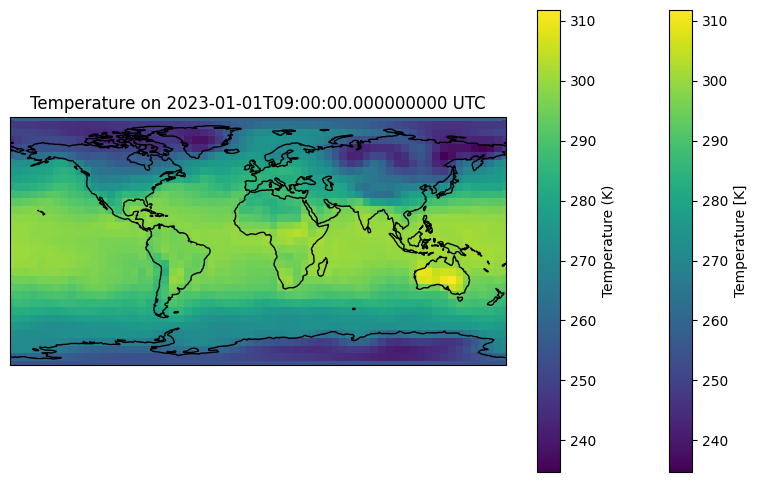

In [179]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Create a new figure
plt.figure(figsize=(10, 6))

# Define the projection (PlateCarree for lat/lon data)
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot temperature data
pcm = temperature_values.isel(time=0).plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(),
                                                     x='longitude', y='latitude',
                                                     cmap='viridis',
                                                     vmin=temperature_values.min(),
                                                     vmax=temperature_values.max())

# Add coastlines
ax.coastlines()

# Add a colorbar
plt.colorbar(pcm, label='Temperature (K)')

# Add title
plt.title('Temperature on {} UTC'.format(temperature_values.time.values[0]))

# Show the plot
plt.show()


Defining a projection, in the context of geographical plotting or mapping, means specifying how the three-dimensional surface of the Earth should be represented on a two-dimensional plane (such as a computer screen or a piece of paper). Since the Earth is roughly spherical, representing its surface on a flat surface requires a projection, which inevitably introduces distortions in properties like distance, area, shape, or direction.

-ccrs.PlateCarree(): This specifies the Plate Carrée projection, which is one of the simplest projections commonly used for visualizing data on a latitude-longitude grid. In the Plate Carrée projection, the latitude and longitude lines form a regular grid, with lines of latitude and longitude appearing as straight, evenly spaced lines. However, this projection results in significant distortion, particularly at higher latitudes, where distances between lines of latitude and longitude
 become increasingly exaggerated.

 -plt.axes(projection=...): This creates a set of axes for plotting, with the specified projection. In this case, the Plate Carrée projection is used, meaning that the data will be plotted directly using latitude and longitude coordinates.


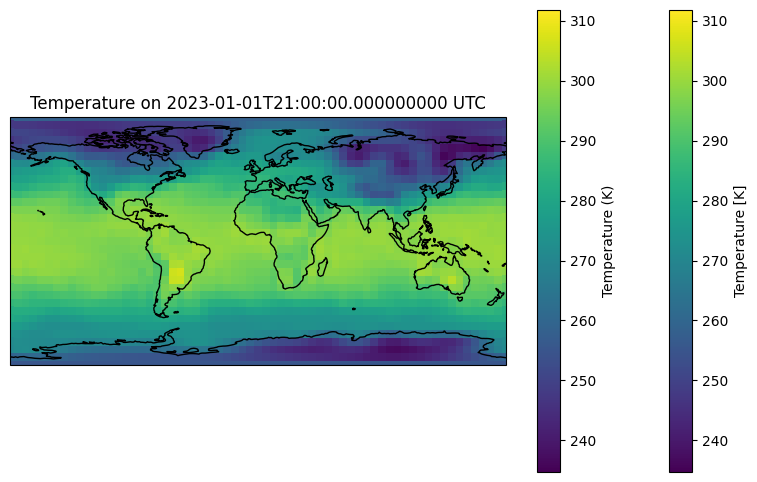

In [188]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Create a new figure
plt.figure(figsize=(10, 6))

# Define the projection (PlateCarree for lat/lon data)
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot temperature data
pcm = temperature_values.isel(time=1).plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(),
                                                     x='longitude', y='latitude',
                                                     cmap='viridis',
                                                     vmin=temperature_values.min(),
                                                     vmax=temperature_values.max())

# Add coastlines
ax.coastlines()

# Add a colorbar
plt.colorbar(pcm, label='Temperature (K)')

# Add title
plt.title('Temperature on {} UTC'.format(temperature_values.time.values[1]))

# Show the plot
plt.show()


questo è il valore di temeperatura alle 21

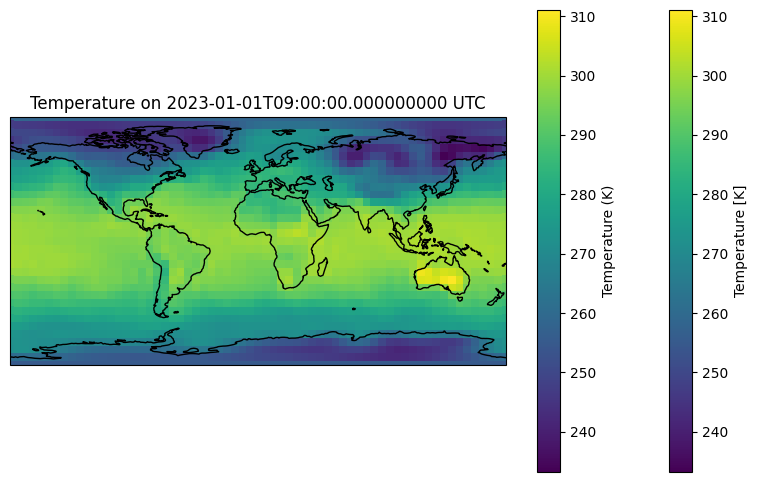

In [181]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Create a new figure
plt.figure(figsize=(10, 6))

# Define the projection (PlateCarree for lat/lon data)
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot temperature data
pcm = temperature_values2.isel(time=0).plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(),
                                                     x='longitude', y='latitude',
                                                     cmap='viridis',
                                                     vmin=temperature_values2.min(),
                                                     vmax=temperature_values2.max())

# Add coastlines
ax.coastlines()

# Add a colorbar
plt.colorbar(pcm, label='Temperature (K)')

# Add title
plt.title('Temperature on {} UTC'.format(temperature_values2.time.values[0]))

# Show the plot
plt.show()


In [183]:
#!/usr/bin/env python
import cdsapi

c = cdsapi.Client()

c.retrieve("reanalysis-era5-complete", {
    "class": "ea",
    "date": "2023-01-01",
    "expver": "1",
    "levelist": "137",
    "levtype": "ml",
    "grid": "5.625/5.625",
    "param": "130",
    "step": "0",
    "stream": "oper",
    "time": "06:00:00/18:00:00",
    "type": "fc",
    "format": "netcdf"
}, "test.nc3")

2024-05-02 14:27:43,337 INFO Welcome to the CDS
INFO:cdsapi:Welcome to the CDS
2024-05-02 14:27:43,341 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-complete
INFO:cdsapi:Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-complete
2024-05-02 14:27:43,669 INFO Request is completed
INFO:cdsapi:Request is completed
2024-05-02 14:27:43,673 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data3/adaptor.mars.external-1714659984.4645982-27901-10-c3d50de2-0bb5-4c18-ba6f-166da1f43d32.nc to test.nc3 (9.7K)
INFO:cdsapi:Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data3/adaptor.mars.external-1714659984.4645982-27901-10-c3d50de2-0bb5-4c18-ba6f-166da1f43d32.nc to test.nc3 (9.7K)
2024-05-02 14:27:43,902 INFO Download rate 42.8K/s
INFO:cdsapi:Download rate 42.8K/s


Result(content_length=9948,content_type=application/x-netcdf,location=https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data3/adaptor.mars.external-1714659984.4645982-27901-10-c3d50de2-0bb5-4c18-ba6f-166da1f43d32.nc)

In [184]:
import subprocess

# Define the command to execute
command = ['ncdump', '-t', '-v', 'latitude,longitude,time', 'test.nc3']

# Execute the command and capture the output
output = subprocess.run(command, capture_output=True, text=True)

# Print the output
print(output.stdout)


netcdf test {
dimensions:
	longitude = 64 ;
	latitude = 33 ;
	time = 2 ;
variables:
	float longitude(longitude) ;
		longitude:units = "degrees_east" ;
		longitude:long_name = "longitude" ;
	float latitude(latitude) ;
		latitude:units = "degrees_north" ;
		latitude:long_name = "latitude" ;
	int time(time) ;
		time:units = "hours since 1900-01-01 00:00:00.0" ;
		time:long_name = "time" ;
		time:calendar = "gregorian" ;
	short t(time, latitude, longitude) ;
		t:scale_factor = 0.00118979297643935 ;
		t:add_offset = 273.786163526363 ;
		t:_FillValue = -32767s ;
		t:missing_value = -32767s ;
		t:units = "K" ;
		t:long_name = "Temperature" ;
		t:standard_name = "air_temperature" ;

// global attributes:
		:Conventions = "CF-1.6" ;
		:history = "2024-05-02 14:26:24 GMT by grib_to_netcdf-2.28.1: /opt/ecmwf/mars-client/bin/grib_to_netcdf -S param -o /cache/data3/adaptor.mars.external-1714659984.4645982-27901-10-c3d50de2-0bb5-4c18-ba6f-166da1f43d32.nc /cache/tmp/c3d50de2-0bb5-4c18-ba6f-166da1f43d

In [185]:
import xarray as xr

# Open the NetCDF file
data3 = xr.open_dataset("test.nc3")

# Access the temperature values
temperature_values3 = data3['t']

# Print the first few rows of the temperature values
print(temperature_values3)


<xarray.DataArray 't' (time: 2, latitude: 33, longitude: 64)>
[4224 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 0.0 5.625 11.25 16.88 ... 343.1 348.8 354.4
  * latitude   (latitude) float32 90.0 84.38 78.75 73.12 ... -78.75 -84.38 -90.0
  * time       (time) datetime64[ns] 2023-01-01T06:00:00 2023-01-01T18:00:00
Attributes:
    units:          K
    long_name:      Temperature
    standard_name:  air_temperature


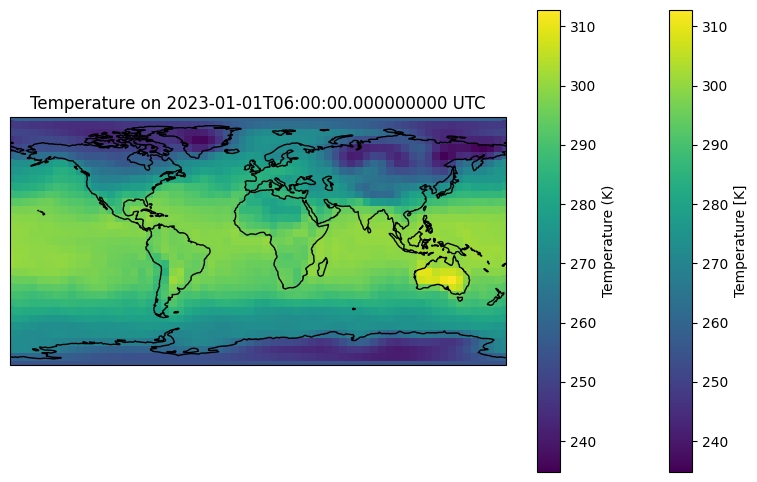

In [186]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Create a new figure
plt.figure(figsize=(10, 6))

# Define the projection (PlateCarree for lat/lon data)
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot temperature data
pcm = temperature_values3.isel(time=0).plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(),
                                                     x='longitude', y='latitude',
                                                     cmap='viridis',
                                                     vmin=temperature_values3.min(),
                                                     vmax=temperature_values3.max())

# Add coastlines
ax.coastlines()

# Add a colorbar
plt.colorbar(pcm, label='Temperature (K)')

# Add title
plt.title('Temperature on {} UTC'.format(temperature_values3.time.values[0]))

# Show the plot
plt.show()


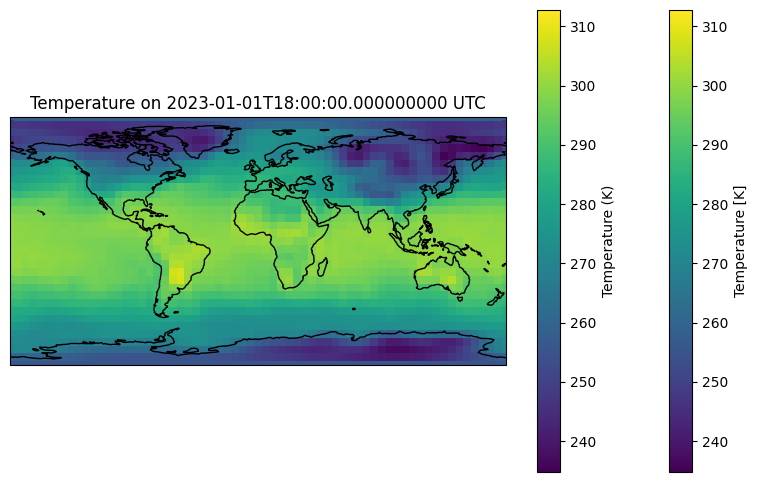

In [189]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Create a new figure
plt.figure(figsize=(10, 6))

# Define the projection (PlateCarree for lat/lon data)
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot temperature data
pcm = temperature_values3.isel(time=1).plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(),
                                                     x='longitude', y='latitude',
                                                     cmap='viridis',
                                                     vmin=temperature_values3.min(),
                                                     vmax=temperature_values3.max())

# Add coastlines
ax.coastlines()

# Add a colorbar
plt.colorbar(pcm, label='Temperature (K)')

# Add title
plt.title('Temperature on {} UTC'.format(temperature_values3.time.values[1]))

# Show the plot
plt.show()


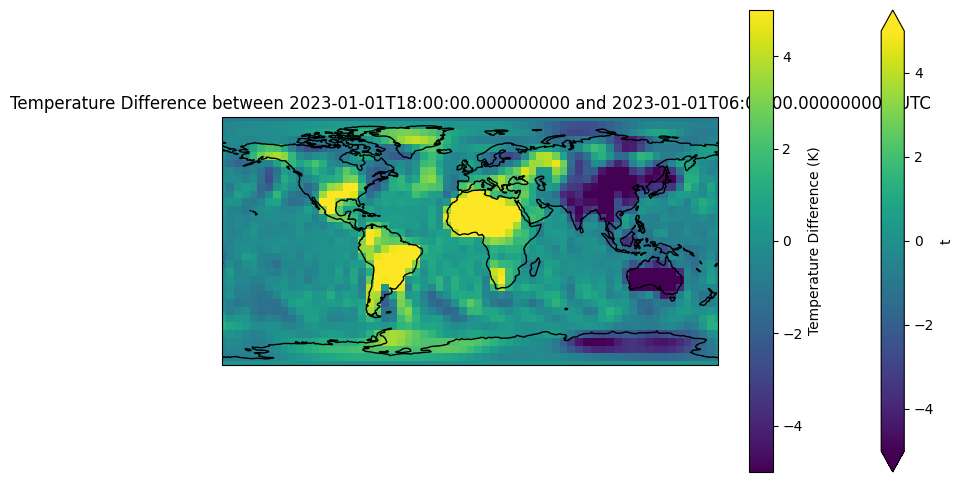

In [191]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Calculate temperature difference between time steps
temperature_difference = temperature_values3.isel(time=1) - temperature_values3.isel(time=0)

# Create a new figure
plt.figure(figsize=(10, 6))

# Define the projection (PlateCarree for lat/lon data)
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot temperature difference data
pcm = temperature_difference.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(),
                                              x='longitude', y='latitude',
                                              cmap='viridis',  # Choose a diverging colormap
                                              vmin=-5, vmax=5)  # Set color scale symmetrically around 0

# Add coastlines
ax.coastlines()

# Add a colorbar
plt.colorbar(pcm, label='Temperature Difference (K)')

# Add title
plt.title('Temperature Difference between {} and {} UTC'.format(temperature_values3.time.values[1], temperature_values3.time.values[0]))

# Show the plot
plt.show()
